# Homework 7, Part Two: A dataset about dogs.

Ana Muñoz. 18 June 2024

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=["Unknown", "UNKNOWN", " "])

In [3]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
# df.shape #there are 81,937 , so commenting out and going back

In [5]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [6]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [7]:
df["Explanation 1"] = "Each row is a dog"
df["Explanation 2"] = "Animal dominant color is each dog's main color, but they may have others."

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [8]:
## 1. We know some cats are females because they have three colors. But can male dogs have three colors? How many males have a third color?
## 2. How many dog's names end with a "y"?
## 3. How many blondes are 10-yr old or older?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: xlabel='Primary Breed'>

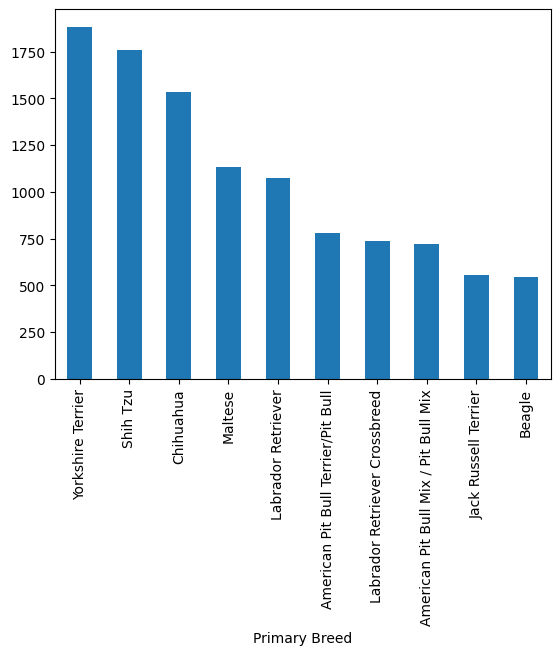

In [9]:
df["Primary Breed"].value_counts().sort_values(ascending=False).head(10).plot.bar(x="Primary Breed")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

<Axes: xlabel='Primary Breed'>

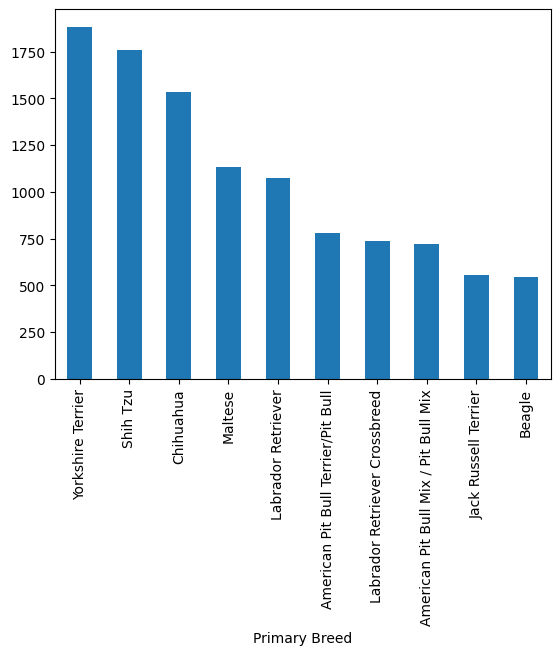

In [10]:
# Updating my pd.read_excel to equal Unknown to nan
df["Primary Breed"].dropna().value_counts().sort_values(ascending=False).head(10).plot.bar(x="Primary Breed")

## What are the most popular dog names?

In [11]:
df["Animal Name"].value_counts().sort_values(ascending=False).head()
#Updating na_values to include UNKNOWN

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
df.loc[df["Animal Name"].isin(["Ana"])]


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Explanation 1,Explanation 2
9609,11360,Ana,F,Labrador Retriever Crossbreed,NaN,BLACK,WHITE,NaN,2008-03-01,Yes,No,Yes,2015-05-29 14:16:54.587,2015-05-29,2016-07-07,Each row is a dog,Animal dominant color is each dog's main color...
15600,11377,Ana,F,NaN,shep/doxie,TAN,BLACK,WHITE,2012-12-01,Yes,No,No,2015-06-24 13:48:37.873,2015-06-24,2016-05-08,Each row is a dog,Animal dominant color is each dog's main color...
29420,10016,Ana,F,Cairn Terrier,NaN,Black,Gray,NaN,2013-07-01,Yes,NaN,Yes,2015-08-19 17:20:20.060,2015-08-19,2016-08-19,Each row is a dog,Animal dominant color is each dog's main color...


In [13]:
df.loc[df["Animal Name"].isin(["Max"])]["Animal Name"].value_counts()  

Animal Name
Max    202
Name: count, dtype: int64

In [14]:
df.loc[df["Animal Name"].isin(["Maxwell"])]["Animal Name"].value_counts()

Animal Name
Maxwell    11
Name: count, dtype: int64

In [15]:
#Checking the results of str.contains for Max out of curiosity...
df.loc[df["Animal Name"].str.contains("Max", na=False)]["Animal Name"].value_counts()  

Animal Name
Max              202
Maximus           27
Maxwell           11
Maxi               8
Maxie              7
                ... 
Max Rodriguez      1
Maximillia         1
Max Caminiti       1
Buddy Max          1
Maximillan         1
Name: count, Length: 94, dtype: int64

## What percentage of dogs are guard dogs?

In [16]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

In [17]:
df["Guard or Trained"] #So many nans that i'm not seeing

0         No
1         No
2        NaN
3         No
4        NaN
        ... 
29995     No
29996     No
29997    NaN
29998     No
29999     No
Name: Guard or Trained, Length: 30000, dtype: object

In [18]:
df["Guard or Trained"].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

In [19]:
df.loc[df["Guard or Trained"] == "Yes"]["Guard or Trained"].value_counts()
yes = df.loc[df["Guard or Trained"] == "Yes"]["Guard or Trained"].value_counts()
yes_percent = yes / 30000 * 100
yes_percent

Guard or Trained
Yes    0.056667
Name: count, dtype: float64

## What are the actual numbers?

In [20]:
#Replied in the previous question

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [21]:
#idem

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [22]:
df["Guard or Trained"].fillna("No")

0        No
1        No
2        No
3        No
4        No
         ..
29995    No
29996    No
29997    No
29998    No
29999    No
Name: Guard or Trained, Length: 30000, dtype: object

In [23]:
df["Guard or Trained"] = df["Guard or Trained"].fillna("No")

In [24]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [25]:
df[df["Guard or Trained"] == "Yes"]["Primary Breed"].value_counts().sort_values(ascending=False)

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [26]:
df.dtypes #it is !

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
Explanation 1                     object
Explanation 2                     object
dtype: object

In [27]:
df["Year"] = df["Animal Birth"].dt.year

In [28]:
df.head() #ok, it's there

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Explanation 1,Explanation 2,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Each row is a dog,Animal dominant color is each dog's main color...,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Each row is a dog,Animal dominant color is each dog's main color...,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Each row is a dog,Animal dominant color is each dog's main color...,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [29]:
today = pd.to_datetime('today')
df["Age"] = (today - df["Animal Birth"])
df["Age"]  #oh no, it's calculated in days

0       6074 days 15:44:33.626972
1       4096 days 15:44:33.626972
2       3578 days 15:44:33.626972
3       5922 days 15:44:33.626972
4       3821 days 15:44:33.626972
                   ...           
29995   5101 days 15:44:33.626972
29996   5162 days 15:44:33.626972
29997   3762 days 15:44:33.626972
29998   5647 days 15:44:33.626972
29999   4492 days 15:44:33.626972
Name: Age, Length: 30000, dtype: timedelta64[ns]

In [30]:
df["Age"] = (today - df["Animal Birth"]).dt.days // 365 

In [31]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Explanation 1,Explanation 2,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Each row is a dog,Animal dominant color is each dog's main color...,2007,16
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Each row is a dog,Animal dominant color is each dog's main color...,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,9
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Each row is a dog,Animal dominant color is each dog's main color...,2008,16
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,10


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [32]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")

In [33]:
df_zip.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [34]:
merged = df.merge(df_zip, left_on="Owner Zip Code", right_on="zip")

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [35]:
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Explanation 1,Explanation 2,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Each row is a dog,Animal dominant color is each dog's main color...,2007,16,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Each row is a dog,Animal dominant color is each dog's main color...,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,9,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Each row is a dog,Animal dominant color is each dog's main color...,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,10,Greenwich Village and Soho,10013,Manhattan


In [36]:
merged[merged["borough"] == "Bronx"]["Animal Name"].value_counts().sort_values(ascending=False).head()


Animal Name
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: count, dtype: int64

In [37]:
merged[merged["borough"] == "Brooklyn"]["Animal Name"].value_counts().sort_values(ascending=False).head()

Animal Name
Max        46
Bella      45
unknown    45
Charlie    42
Rocky      36
Name: count, dtype: int64

In [38]:
merged[merged["borough"] == "Upper East Side"]["Animal Name"].value_counts().sort_values(ascending=False).head() #uh oh, seems the UPS is not a borough

Series([], Name: count, dtype: int64)

## What is the most common dog breed in each of the neighborhoods of NYC?

In [39]:
merged[merged["neighborhood"] == "Upper East Side"]["Animal Name"].value_counts().sort_values(ascending=False).head() #uh oh, seems the UPS is not a borough

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: count, dtype: int64

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [40]:
merged["Spayed or Neut"].value_counts() #Ok, there are no Nans hiding

Spayed or Neut
Yes    24300
No      5273
Name: count, dtype: int64

In [41]:
#Male or Female ?
merged["Animal Gender"].value_counts() #some empty values, transforming them to NaN on top of the code

Animal Gender
M    16020
F    13550
Name: count, dtype: int64

In [42]:
merged["Animal Gender"] = merged["Animal Gender"].fillna("Unknown") #So unknown has a clear category

In [43]:
merged.groupby("Animal Gender")["Spayed or Neut"].value_counts()   

Animal Gender  Spayed or Neut
F              Yes               11620
               No                 1930
M              Yes               12677
               No                 3343
Unknown        Yes                   3
Name: count, dtype: int64

In [44]:
F_No = len(merged[(merged["Animal Gender"] == "F") & (merged["Spayed or Neut"] == "No")])
M_No = len(merged[(merged["Animal Gender"] == "M") & (merged["Spayed or Neut"] == "No")])
F_total = len(merged[(merged["Animal Gender"] == "F")])
M_total = len(merged[(merged["Animal Gender"] == "M")])
F_prop = F_No / F_total * 100
M_prop = M_No / M_total * 100
if F_prop > M_prop:
    print("Female dogs are less likely to be spayed.")
else:
    print("Male dogs are less likely to be spayed.")

Male dogs are less likely to be spayed.


In [45]:
#Breed ?
merged["Primary Breed"].value_counts()   #Too many, don't know if there are nans hiding

Primary Breed
Yorkshire Terrier            1861
Shih Tzu                     1739
Chihuahua                    1516
Maltese                      1116
Labrador Retriever           1065
                             ... 
Fila Brasileiro                 1
Borzoi                          1
Curly-Coated Retriever          1
Canaan Dog                      1
German Longhaired Pointer       1
Name: count, Length: 249, dtype: int64

In [46]:
merged["Primary Breed"] = merged["Primary Breed"].fillna("Unknown") #So unknown has a clear category... which also means i'm kind of undoing na_values


In [47]:
merged[merged["Spayed or Neut"] == "No"]["Primary Breed"].value_counts().sort_values(ascending=False) 

Primary Breed
Yorkshire Terrier    531
Unknown              416
Shih Tzu             401
Chihuahua            303
Maltese              300
                    ... 
Saint Bernard          1
Brittany               1
Greyhound              1
German Pinscher        1
Lakeland Terrier       1
Name: count, Length: 191, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

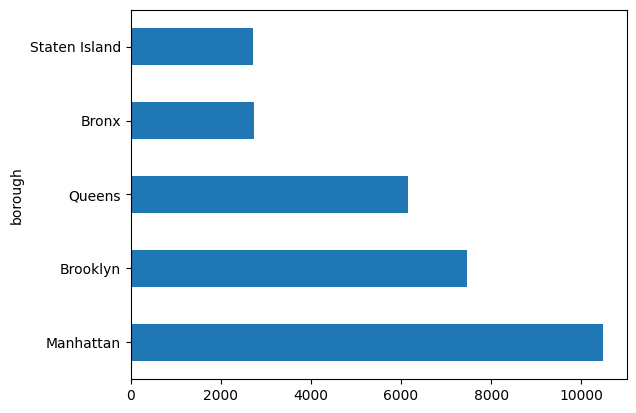

In [48]:
merged["borough"].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [49]:
popu = pd.read_csv("boro_population.csv")

In [50]:
popu.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [51]:
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Explanation 1,Explanation 2,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Each row is a dog,Animal dominant color is each dog's main color...,2007,16,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Each row is a dog,Animal dominant color is each dog's main color...,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,9,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Each row is a dog,Animal dominant color is each dog's main color...,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,10,Greenwich Village and Soho,10013,Manhattan


In [52]:
merged2 = merged.merge(popu, left_on="borough", right_on="borough")

In [53]:
merged2.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Expired Date,Explanation 1,Explanation 2,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2016-09-19,Each row is a dog,Animal dominant color is each dog's main color...,2007,16,Upper West Side,10024,Manhattan,1644518,23
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,2018-09-20,Each row is a dog,Animal dominant color is each dog's main color...,2013,11,Southeast Bronx,10461,Bronx,1455444,42
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,9,Greenwich Village and Soho,10013,Manhattan,1644518,23
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2017-10-20,Each row is a dog,Animal dominant color is each dog's main color...,2008,16,Upper West Side,10025,Manhattan,1644518,23
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2019-09-12,Each row is a dog,Animal dominant color is each dog's main color...,2014,10,Greenwich Village and Soho,10013,Manhattan,1644518,23


In [54]:
# merged2["borough"].value_counts() / merged2.groupby("borough")["population"]

# merged2.groupby("borough")["Animal Name"].count() / merged2["population"]

per_capita = merged2.groupby("borough")["Animal Name"].count() / merged2.groupby("borough")["population"].mean()
per_capita

borough
Bronx            0.001869
Brooklyn         0.002769
Manhattan        0.006275
Queens           0.002600
Staten Island    0.005687
dtype: float64

In [55]:
# Down the dictionaries road, didn't know how to continue...bc this is pandas
# dogs_dict = merged2["borough"].value_counts()
# dogs_dict.to_dict()

In [56]:
# popu_dict = popu.to_dict()
# popu_dict

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='Primary Breed'>

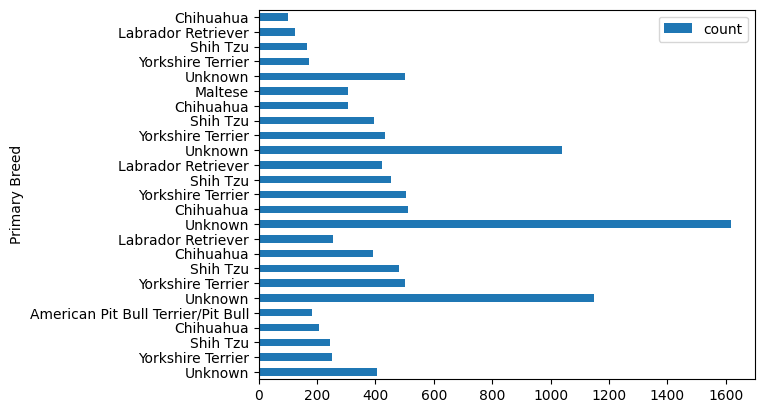

In [57]:
#Following GPT advice...
grouped = merged2.groupby('borough')['Primary Breed'].value_counts().reset_index(name='count')
grouped.groupby('borough').head(5).plot.barh(x="Primary Breed")
#but it's not 100% satisfying

In [58]:
#Tried several angles with TA Laura..
grouped = merged2.groupby('borough')['Primary Breed'].value_counts().reset_index(name='count')
grouped = grouped.groupby('borough').head(5)
grouped

,borough,Primary Breed,count
0,Bronx,Unknown,404
1,Bronx,Yorkshire Terrier,250
2,Bronx,Shih Tzu,244
3,Bronx,Chihuahua,208
4,Bronx,American Pit Bull Terrier/Pit Bull,181
148,Brooklyn,Unknown,1150
149,Brooklyn,Yorkshire Terrier,501
150,Brooklyn,Shih Tzu,481
151,Brooklyn,Chihuahua,391
152,Brooklyn,Labrador Retriever,255


In [59]:
color_map = {
    'Manhattan': 'blue',
    'Brooklyn': 'green',
    'Queens': 'red',
    'Bronx': 'purple',
    'Staten Island': 'orange'
}

In [60]:
colors = grouped['borough'].map(color_map)

<Axes: ylabel='Primary Breed'>

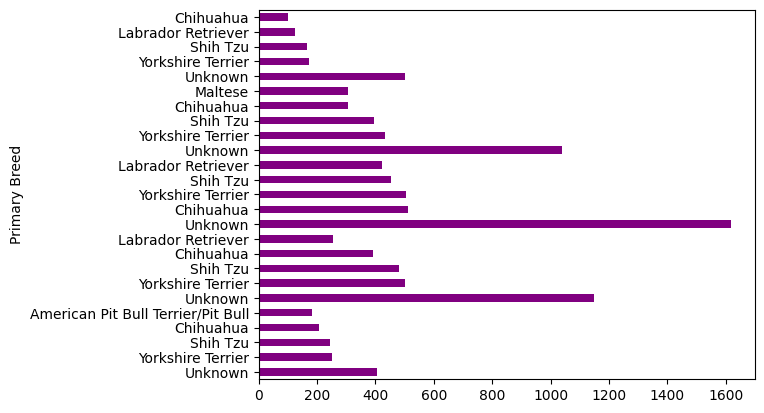

In [61]:
grouped.plot.barh(x="Primary Breed", color=colors, legend=False)

In [63]:
#Trials with Laura and GPT...
#fig, ax = plt.subplots()

# for index, row in grouped.iterrows():
  #  ax.barh(row['Primary Breed'], row['count'], color=row['color'])

#ax.set_xlabel('Count')
#ax.set_ylabel('Primary Breed')
#plt.show()

<Axes: ylabel='Primary Breed'>

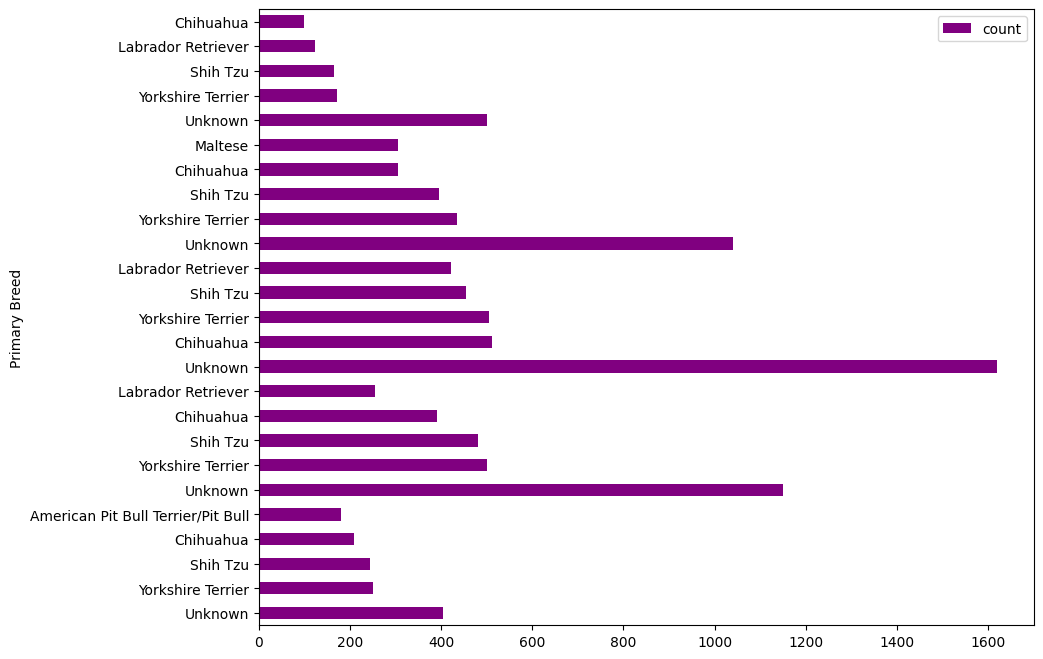

In [64]:
#More trials... all is purple
grouped['Color'] = grouped['borough'].map(color_map)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Plot using a single call, setting the color directly
grouped.plot.barh(
    x='Primary Breed',
    color=grouped['Color'], 
    ax=ax
)

In [65]:
grouped #new grouped has color column but still not working

,borough,Primary Breed,count,Color
0,Bronx,Unknown,404,purple
1,Bronx,Yorkshire Terrier,250,purple
2,Bronx,Shih Tzu,244,purple
3,Bronx,Chihuahua,208,purple
4,Bronx,American Pit Bull Terrier/Pit Bull,181,purple
148,Brooklyn,Unknown,1150,green
149,Brooklyn,Yorkshire Terrier,501,green
150,Brooklyn,Shih Tzu,481,green
151,Brooklyn,Chihuahua,391,green
152,Brooklyn,Labrador Retriever,255,green


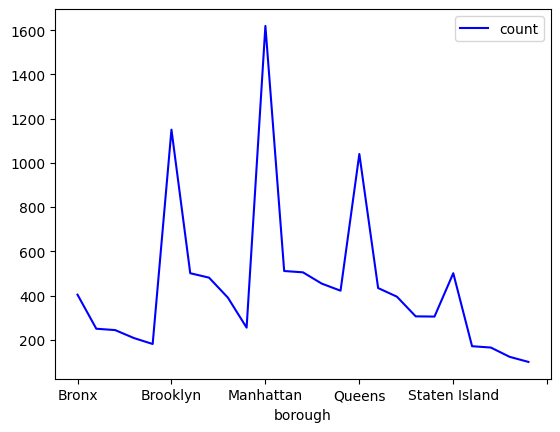

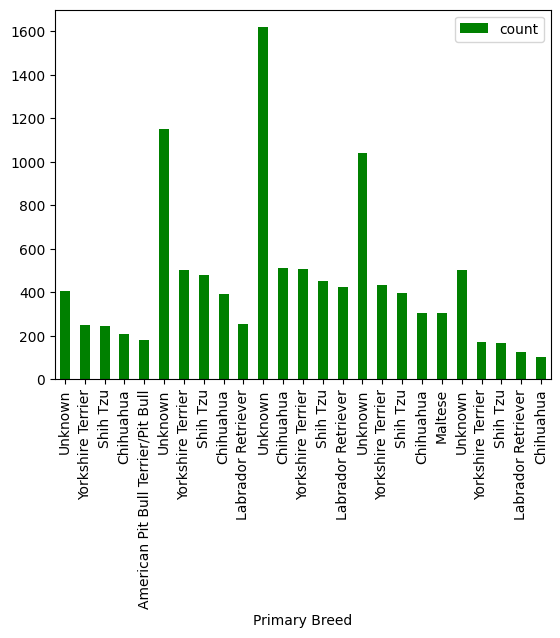

In [66]:
grouped.plot(kind='line', x='borough', y='count', color='blue')
grouped.plot(kind='bar', x='Primary Breed', y='count', color='green')
plt.show()

#How to merge both?

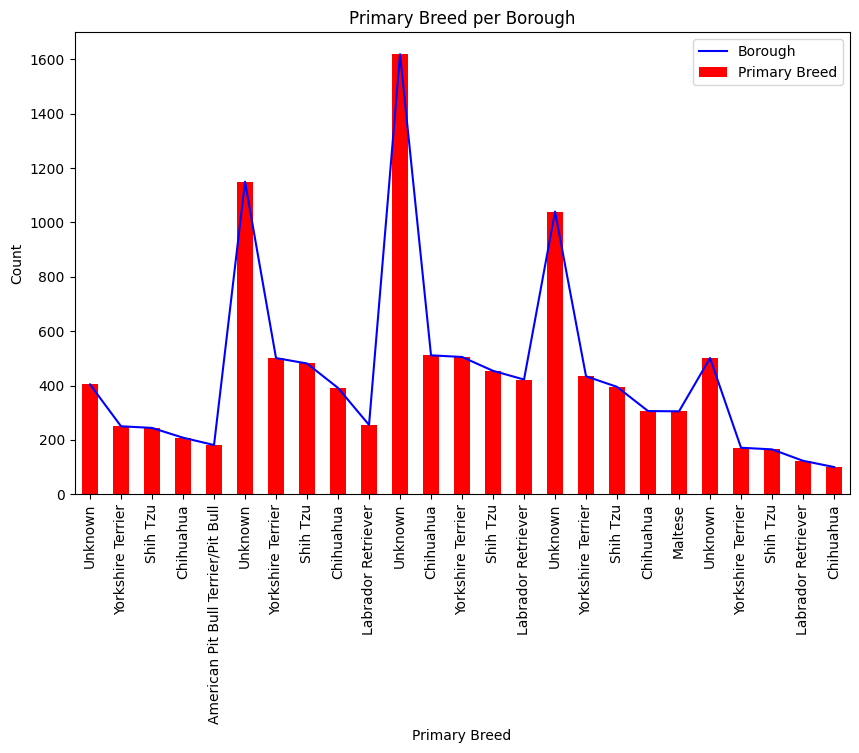

In [67]:
# Plot the first column
ax = grouped.plot(kind='line', x='borough', y='count', color='blue', label='Borough', figsize=(10, 6))

# Plot the second column on the same axes
grouped.plot(kind='bar', x='Primary Breed', y='count', color='red', label='Primary Breed', ax=ax)

# Adding labels and title
plt.ylabel('Count')
plt.title('Primary Breed per Borough')
plt.legend()

# Display the plot
plt.show()


#Almost there...?